# EDA

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [27]:
# Import the dataset
dataset_path= "C:/Dell/All Documents/Vợ iu/University/DSTI/Course 1 - Machine Learning with Python Labs/Dataset_Patient_Characteristics_Survey__PCS___2019.txt"

dataset = pd.read_csv(dataset_path, sep=";")
dataset.head()

,Survey Year,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,...,No Insurance,Unknown Insurance Coverage,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance,Criminal Justice Status,Three Digit Residence Zip Code
0,2019,OUTPATIENT,LONG ISLAND REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"YES, HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,False,YES,YES,NO,NO,NO,NO,NO,117
1,2019,OUTPATIENT,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,False,YES,YES,NO,NO,NO,NO,NO,100
2,2019,OUTPATIENT,HUDSON RIVER REGION,ADULT,MALE,"NO, NOT TRANSGENDER",LESBIAN OR GAY,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,False,YES,YES,NO,NO,NO,NO,NO,120
3,2019,RESIDENTIAL,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,UNKNOWN,OTHER,OTHER LIVING SITUATION,...,NO,False,YES,NO,NO,NO,NO,NO,NO,114
4,2019,OUTPATIENT,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,False,YES,YES,NO,NO,NO,NO,NO,142


In [28]:
#List the columns name
dataset.columns

Index(['Survey Year', 'Program Category', 'Region Served', 'Age Group', 'Sex',
       'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
       'Living Situation', 'Household Composition', 'Preferred Language',
       'Religious Preference', 'Veteran Status', 'Employment Status',
       'Number Of Hours Worked Each Week', 'Education Status',
       'Special Education Services', 'Mental Illness',
       'Intellectual Disability', 'Autism Spectrum',
       'Other Developmental Disability', 'Alcohol Related Disorder',
       'Drug Substance Disorder', 'Opioid Related Disorder',
       'Mobility Impairment Disorder', 'Hearing Impairment',
       'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
       'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack', 'Stroke',
       'Other Cardiac', 'Pulmonary Asthma', 'Alzheimer or Dementia',
       'Kidney Disease', 'Liver Disease', 'Endocrine Condition',
       'Neurological Condition', 'Traumatic Brain Injury', 'J

In [29]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196102 entries, 0 to 196101
Data columns (total 76 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Survey Year                       196102 non-null  int64 
 1   Program Category                  196102 non-null  object
 2   Region Served                     196102 non-null  object
 3   Age Group                         196102 non-null  object
 4   Sex                               196102 non-null  object
 5   Transgender                       196102 non-null  object
 6   Sexual Orientation                196102 non-null  object
 7   Hispanic Ethnicity                196102 non-null  object
 8   Race                              196102 non-null  object
 9   Living Situation                  196102 non-null  object
 10  Household Composition             196102 non-null  object
 11  Preferred Language                196102 non-null  object
 12  Re

In [30]:
#Check if there is na values
print(dataset.isna().sum())

Survey Year                       0
Program Category                  0
Region Served                     0
Age Group                         0
Sex                               0
                                 ..
Private Insurance                 0
Child Health Plus Insurance       0
Other Insurance                   0
Criminal Justice Status           0
Three Digit Residence Zip Code    0
Length: 76, dtype: int64


1. We have no Null value or NA values.
2. Also, we have 196102 record. The Mental Illness columns has 3 possible outcome: Yes, No and UNKNOWN. "UNKNOW" is not really important. 
3. So, it is interessting to see how many "UNKNOW" do we have in the dataset.

In [31]:
#Count the number of "Unknown" in the "Mentall illness" column
dataset.loc[dataset["Mental Illness"] == "UNKNOWN"].count()

Survey Year                       1985
Program Category                  1985
Region Served                     1985
Age Group                         1985
Sex                               1985
                                  ... 
Private Insurance                 1985
Child Health Plus Insurance       1985
Other Insurance                   1985
Criminal Justice Status           1985
Three Digit Residence Zip Code    1985
Length: 76, dtype: int64

Only 1985 out of 196102 record as "UNKNOWN" as Mentall Illness diagnosis. This means that it can be removed.

In [32]:
#Remove rows with "UNKNOWN" in "Mental Illness" columns
dataset = dataset.drop(dataset.loc[dataset['Mental Illness'] == "UNKNOWN"].index)

#Check
dataset.loc[dataset["Mental Illness"] == "UNKNOWN"].count()

Survey Year                       0
Program Category                  0
Region Served                     0
Age Group                         0
Sex                               0
                                 ..
Private Insurance                 0
Child Health Plus Insurance       0
Other Insurance                   0
Criminal Justice Status           0
Three Digit Residence Zip Code    0
Length: 76, dtype: int64

Total number of columns: 76, and most of the columns have more than 3 responses possible --> Too much to work with.

Let's see if we can reduce the number of categories per columns, then features.

Workflow:
1. Group the columns by their corresponding caterogies (Demographic, clinical, social & Insurrance) with respect to the target "Mental Illness"
2. Feature evaluation: check the importance of each feature with respect to their group
3. in each group/class, aggregate features that are:
    a. Highly correlated with each other (kind of redudant)
    b. And have similar relationship with the target "Mental Illness"
4. finally, build the final feature set (new dataset with fewer columns)

In [33]:
# Define feature groups: features devided into 4 groups

feature_groups = {
    #Demographic group
    "Demographic": [
                    'Survey Year', 'Program Category', 'Region Served', 'Age Group', 'Sex',
                    'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
                    'Preferred Language', 'Religious Preference', 'Veteran Status',
                    'Three Digit Residence Zip Code'
                   ],

    #Clinical
    "Clinical": [
                    # Mental
                    'Mental Illness', 'Intellectual Disability', 'Autism Spectrum',
                    'Other Developmental Disability', 'Alcohol Related Disorder',
                    'Drug Substance Disorder', 'Opioid Related Disorder',
                    'Serious Mental Illness', 'Principal Diagnosis Class', 'Additional Diagnosis Class',
                    #Physical
                    'Mobility Impairment Disorder', 'Hearing Impairment', 'Visual Impairment',
                    'Speech Impairment', 'Hyperlipidemia', 'High Blood Pressure', 'Diabetes',
                    'Obesity', 'Heart Attack', 'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
                    'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
                    'Endocrine Condition', 'Neurological Condition', 'Traumatic Brain Injury',
                    'Joint Disease', 'Cancer', 'Other Chronic Med Condition',
                    'No Chronic Med Condition', 'Unknown Chronic Med Condition',
                    #Substance use
                    'Cannabis Recreational Use', 'Cannabis Medicinal Use', 'Smokes',
                    'Received Smoking Medication', 'Received Smoking Counseling',
                    'Alcohol 12m Service', 'Opioid 12m Service', 'Drug/Substance 12m Service'
                ],

    # Social
    "Social": [
                'Living Situation', 'Household Composition', 'Employment Status',
                'Number Of Hours Worked Each Week', 'Education Status',
                'Special Education Services', 'Criminal Justice Status',
                'SSI Cash Assistance', 'SSDI Cash Assistance', 'Veterans Disability Benefits',
                'Veterans Cash Assistance', 'Public Assistance Cash Program',
                'Other Cash Benefits'
              ],

    # Insurance
    "Insurance": [
                   'Medicaid and Medicare Insurance', 'No Insurance',
                   'Unknown Insurance Coverage', 'Medicaid Insurance',
                   'Medicaid Managed Insurance', 'Medicare Insurance',
                   'Private Insurance', 'Child Health Plus Insurance', 'Other Insurance'
                 ]
    }



In [34]:
data_group={}
for group, features in feature_groups.items():
    data_group[group] = dataset[features]

Demographic = data_group["Demographic"]
Clinical = data_group["Clinical"]
Social = data_group['Social']
Insurance = data_group["Insurance"]
target = pd.DataFrame({"Mental Illness": dataset["Mental Illness"]})

# EDA Demographic Group

In [35]:
Demographic.head()

,Survey Year,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Preferred Language,Religious Preference,Veteran Status,Three Digit Residence Zip Code
0,2019,OUTPATIENT,LONG ISLAND REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"YES, HISPANIC/LATINO",WHITE ONLY,ENGLISH,DATA NOT AVAILABLE,NO,117
1,2019,OUTPATIENT,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,ENGLISH,I BELONG TO A FORMAL RELIGIOUS GROUP,NO,100
2,2019,OUTPATIENT,HUDSON RIVER REGION,ADULT,MALE,"NO, NOT TRANSGENDER",LESBIAN OR GAY,"NO, NOT HISPANIC/LATINO",WHITE ONLY,ENGLISH,I BELONG TO A FORMAL RELIGIOUS GROUP,NO,120
3,2019,RESIDENTIAL,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,UNKNOWN,OTHER,ENGLISH,DATA NOT AVAILABLE,NO,114
4,2019,OUTPATIENT,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,ENGLISH,"I CONSIDER MYSELF SPIRITUAL, BUT NOT RELIGIOUS",NO,142


Features behavior with respect to the target

I will be using the frequency tables to evaluate how the features in the Demographic Group behave. This will allow us to see if their is any relationship between features.

Important: research on frequency tables

https://heartbeat.comet.ml/exploratory-data-analysis-eda-for-categorical-data-870b37a79b65

In [36]:
# new demographic group dataset (I add the target)
new_dem_grp = Demographic.copy()
new_dem_grp["Mental Illness"] = target["Mental Illness"].values
new_dem_grp.head()

,Survey Year,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Preferred Language,Religious Preference,Veteran Status,Three Digit Residence Zip Code,Mental Illness
0,2019,OUTPATIENT,LONG ISLAND REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"YES, HISPANIC/LATINO",WHITE ONLY,ENGLISH,DATA NOT AVAILABLE,NO,117,YES
1,2019,OUTPATIENT,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,ENGLISH,I BELONG TO A FORMAL RELIGIOUS GROUP,NO,100,YES
2,2019,OUTPATIENT,HUDSON RIVER REGION,ADULT,MALE,"NO, NOT TRANSGENDER",LESBIAN OR GAY,"NO, NOT HISPANIC/LATINO",WHITE ONLY,ENGLISH,I BELONG TO A FORMAL RELIGIOUS GROUP,NO,120,YES
3,2019,RESIDENTIAL,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,UNKNOWN,OTHER,ENGLISH,DATA NOT AVAILABLE,NO,114,YES
4,2019,OUTPATIENT,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,ENGLISH,"I CONSIDER MYSELF SPIRITUAL, BUT NOT RELIGIOUS",NO,142,YES


In [38]:
# frequency_table  function
def frequency_table(data: pd.DataFrame, target_col: str, feature_cols):
    freq_tab = pd.crosstab(index = data[target_col], columns = data[feature_cols], margins = True)
    rel_table = round(freq_tab/freq_tab.loc["All"], 2)
    return freq_tab, rel_table

Multivariate analysis

In [39]:
#analysis Program Category column
#Survey year column to be dropped

for col in new_dem_grp.columns[1:-2]:
    freq, rel = frequency_table(new_dem_grp, "Mental Illness", col)
    print("Two-way frequency table")
    print(freq)
    #print("Two-way relative frequency table")
    #print(rel)
    print("------" * 15)
    print()
    print()


Two-way frequency table
Program Category  EMERGENCY  INPATIENT  OUTPATIENT  RESIDENTIAL  SUPPORT  \
Mental Illness                                                             
NO                      237         49        3624          315     1352   
YES                    2980       8880      128552        29742    18386   
All                    3217       8929      132176        30057    19738   

Program Category     All  
Mental Illness            
NO                  5577  
YES               188540  
All               194117  
------------------------------------------------------------------------------------------


Two-way frequency table
Region Served   CENTRAL NY REGION  HUDSON RIVER REGION  LONG ISLAND REGION  \
Mental Illness                                                               
NO                            476                  785                 700   
YES                         21573                26274               14533   
All                         220

We can see that we have huge imbalance in every columns: more "Mental Illness" with YES than NO

So, it is important to investigate at column level to see if changing&reducing the number of categories in columns can diminish the imbalance problem.

make a "before vs after" visual compairison using Bar plots

#### Categories smart aggregation

In [40]:
# Functions defintion

# Program Category
def aggregate_program_category(df):
    "This function aggregates the initial 5 categories into 3"
    return df['Program Category'].replace({
                                            'EMERGENCY': 'CRISIS/INPATIENT',
                                            'INPATIENT': 'CRISIS/INPATIENT',
                                            'OUTPATIENT': 'OUTPATIENT',
                                            'RESIDENTIAL': 'COMMUNITY/SUPPORTIVE',
                                            'SUPPORT': 'COMMUNITY/SUPPORTIVE'
                                        })

# Region Served
def aggregate_region_served(df):
    "This function aggregates the initial 5 categories into 3"
    return df['Region Served'].replace({
                                        'NEW YORK CITY REGION': 'NEW YORK CITY',
                                        'LONG ISLAND REGION': 'DOWNSTATE',
                                        'HUDSON RIVER REGION': 'DOWNSTATE',
                                        'CENTRAL NY REGION': 'UPSTATE',
                                        'WESTERN REGION': 'UPSTATE'
                                    })

# Transgender
def aggregate_transgender(df):
    "This function aggregates the initial 4 categories into 2"
    return df['Transgender'].replace({
                                    'NO, NOT TRANSGENDER': 'CISGENDER',
                                    'YES, TRANSGENDER': 'TRANSGENDER/UNKNOWN',
                                    "CLIENT DIDN'T ANSWER": 'TRANSGENDER/UNKNOWN',
                                    'UNKNOWN': 'TRANSGENDER/UNKNOWN'
                                })

# Sexual Orientation
def aggregate_sexual_orientation(df):
    "This function aggregates the initial 6 categories into 3"
    return df['Sexual Orientation'].replace({
                                            'STRAIGHT OR HETEROSEXUAL': 'HETEROSEXUAL',
                                            'LESBIAN OR GAY': 'LGBTQ+',
                                            'BISEXUAL': 'LGBTQ+',
                                            'OTHER': 'LGBTQ+',
                                            'CLIENT DID NOT ANSWER': 'UNKNOWN',
                                            'UNKNOWN': 'UNKNOWN'
                                        })

# Hispanic Ethnicity
def aggregate_hispanic_ethnicity(df):
    "This function improves the interpretability"
    return df['Hispanic Ethnicity'].replace({
                                            'YES, HISPANIC/LATINO': 'HISPANIC',
                                            'NO, NOT HISPANIC/LATINO': 'NON-HISPANIC',
                                            'UNKNOWN': 'UNKNOWN'
                                        })

# Race
def aggregate_race(df):
    "This function aggregates the initial 5 categories into 4"
    return df['Race'].replace({
                                'WHITE ONLY': 'WHITE',
                                'BLACK ONLY': 'BLACK',
                                'MULTI-RACIAL': 'OTHER/MULTIRACIAL',
                                'OTHER': 'OTHER/MULTIRACIAL',
                                'UNKNOWN RACE': 'UNKNOWN'
                            })

# Preferred Language
def aggregate_preferred_language(df):
    "This function aggregates the initial categories into 3"
    return df['Preferred Language'].replace({
                                            'ENGLISH': 'ENGLISH',
                                            'UNKNOWN': 'UNKNOWN'
                                        }).where(df['Preferred Language'].isin(['ENGLISH', 'UNKNOWN']), 'OTHER LANGUAGE')


# Religious Preference
def aggregate_religious_preference(df):
    return df['Religious Preference'].replace({
                                                'I BELONG TO A FORMAL RELIGIOUS GROUP': 'RELIGIOUS',
                                                'I CONSIDER MYSELF SPIRITUAL, BUT NOT RELIGIOUS': 'SPIRITUAL/NON-RELIGIOUS',
                                                'I DO NOT HAVE A FORMAL RELIGION, NOR AM I A SPIRITUAL PERSON': 'SPIRITUAL/NON-RELIGIOUS',
                                                'DATA NOT AVAILABLE': 'UNKNOWN'
                                            })

# Veteran Status
def aggregate_veteran_status(df):
    return df['Veteran Status'].replace({
                                            'YES': 'VETERAN',
                                            'NO': 'NON-VETERAN/UNKNOWN',
                                            'UNKNOWN': 'NON-VETERAN/UNKNOWN'
                                        })


In [41]:
# Use all the aggregation funxtions into one
def apply_all_aggregations(df):
    df = df.copy()
    df['Program Category'] = aggregate_program_category(df)
    df['Region Served'] = aggregate_region_served(df)
    df['Transgender'] = aggregate_transgender(df)
    df['Sexual Orientation'] = aggregate_sexual_orientation(df)
    df['Hispanic Ethnicity'] = aggregate_hispanic_ethnicity(df)
    df['Race'] = aggregate_race(df)
    df['Preferred Language'] = aggregate_preferred_language(df)
    df['Religious Preference'] = aggregate_religious_preference(df)
    df['Veteran Status'] = aggregate_veteran_status(df)
    return df


In [42]:
# Apply to demographic dataset
Demographic_cat_agg = apply_all_aggregations(new_dem_grp)

# check unique values after aggregation
for col in Demographic_cat_agg.columns:
    print(f"{col} → {Demographic_cat_agg[col].unique()}")


Survey Year → [2019]
Program Category → ['OUTPATIENT' 'COMMUNITY/SUPPORTIVE' 'CRISIS/INPATIENT']
Region Served → ['DOWNSTATE' 'NEW YORK CITY' 'UPSTATE']
Age Group → ['ADULT' 'CHILD' 'UNKNOWN']
Sex → ['MALE' 'FEMALE' 'UNKNOWN']
Transgender → ['CISGENDER' 'TRANSGENDER/UNKNOWN']
Sexual Orientation → ['HETEROSEXUAL' 'LGBTQ+' 'UNKNOWN']
Hispanic Ethnicity → ['HISPANIC' 'NON-HISPANIC' 'UNKNOWN']
Race → ['WHITE' 'OTHER/MULTIRACIAL' 'BLACK' 'UNKNOWN']
Preferred Language → ['ENGLISH' 'OTHER LANGUAGE' 'UNKNOWN']
Religious Preference → ['UNKNOWN' 'RELIGIOUS' 'SPIRITUAL/NON-RELIGIOUS']
Veteran Status → ['NON-VETERAN/UNKNOWN' 'VETERAN']
Three Digit Residence Zip Code → [117 100 120 114 142 140 999 147 112 116 107 109 105 131 145 144 129 132
 888 139 130 121 141 124 136 103 134 135 133 143 115 104 113 148 137 106
 777 128 119 108 111 126 123 125 138 122 146 110 127 149 101 118]
Mental Illness → ['YES' 'NO']


In [43]:
#Let's check again the imbalace between "Yes" an "No" in the target column "Mental Illness"

for col in Demographic_cat_agg.columns[1:-2]:
    freq, rel = frequency_table(Demographic_cat_agg, "Mental Illness", col)
    print("Two-way frequency table")
    print(freq)
    #print("Two-way relative frequency table")
    #print(rel)
    print("------" * 15)
    print()
    print()

Two-way frequency table
Program Category  COMMUNITY/SUPPORTIVE  CRISIS/INPATIENT  OUTPATIENT     All
Mental Illness                                                              
NO                                1667               286        3624    5577
YES                              48128             11860      128552  188540
All                              49795             12146      132176  194117
------------------------------------------------------------------------------------------


Two-way frequency table
Region Served   DOWNSTATE  NEW YORK CITY  UPSTATE     All
Mental Illness                                           
NO                   1485           2447     1645    5577
YES                 40807          93231    54502  188540
All                 42292          95678    56147  194117
------------------------------------------------------------------------------------------


Two-way frequency table
Age Group        ADULT  CHILD  UNKNOWN     All
Mental Illness      

#### Visual compairison

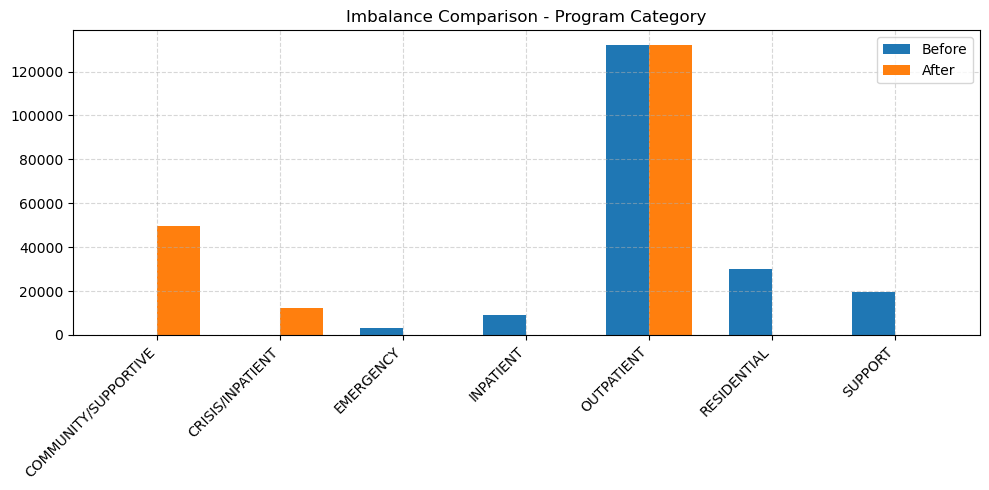

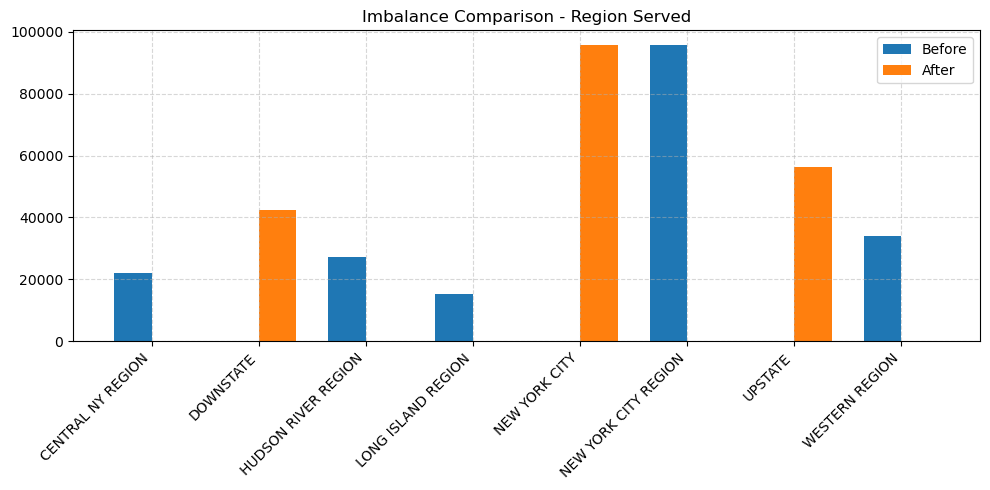

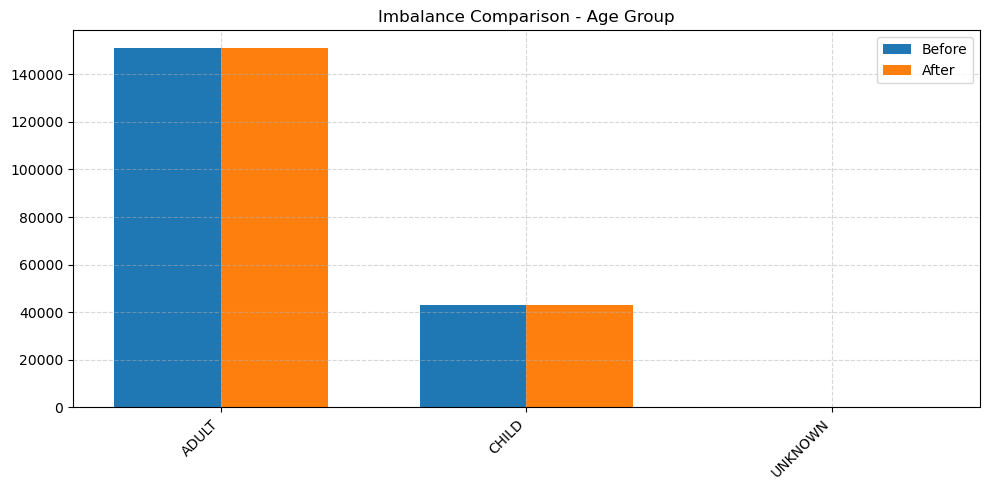

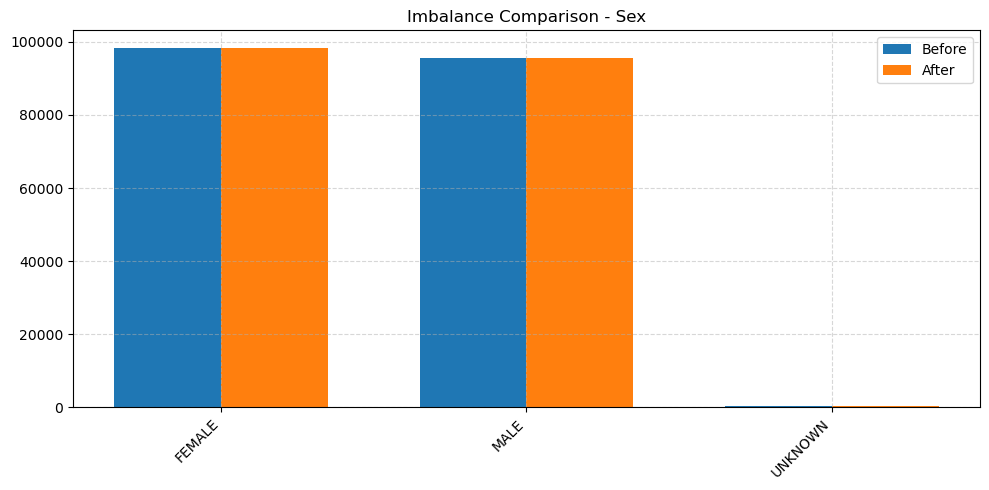

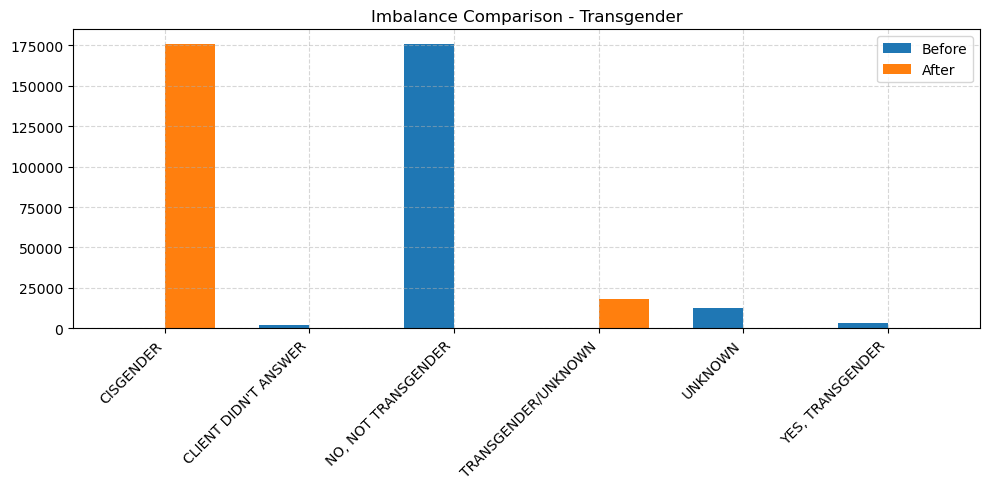

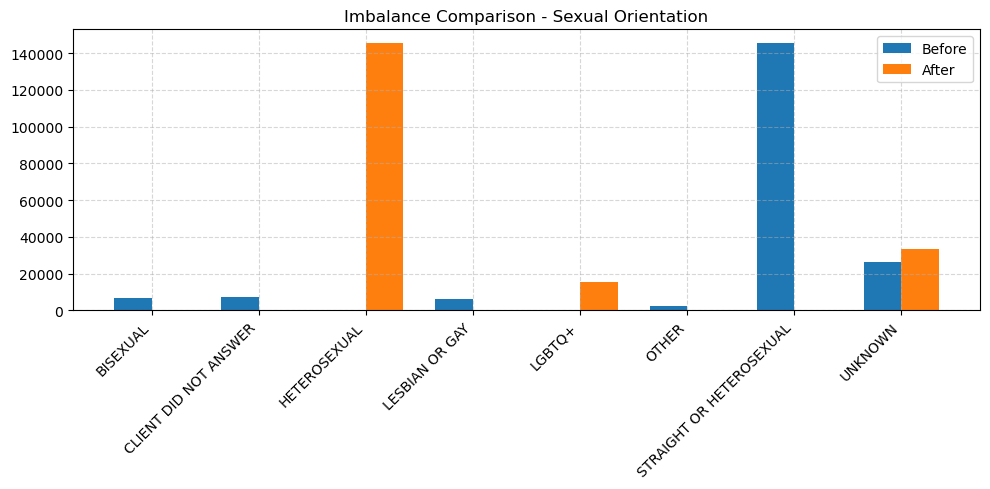

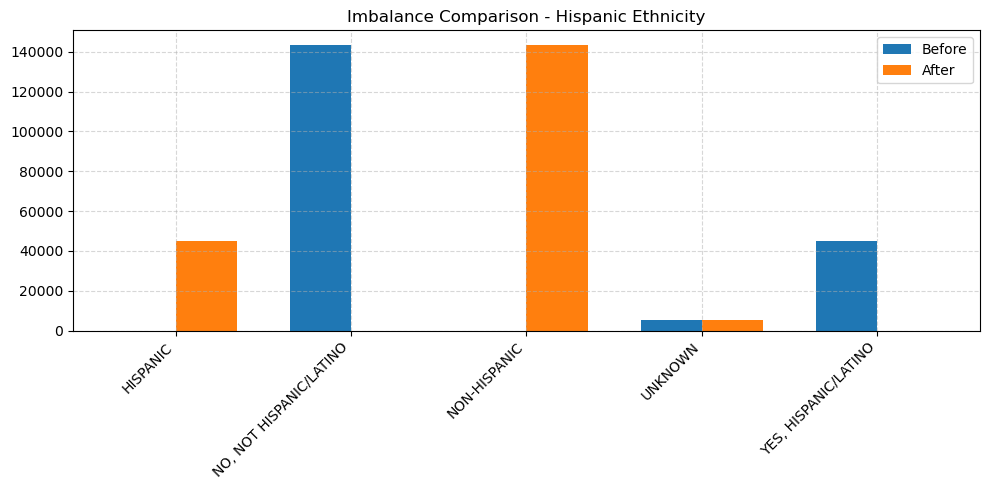

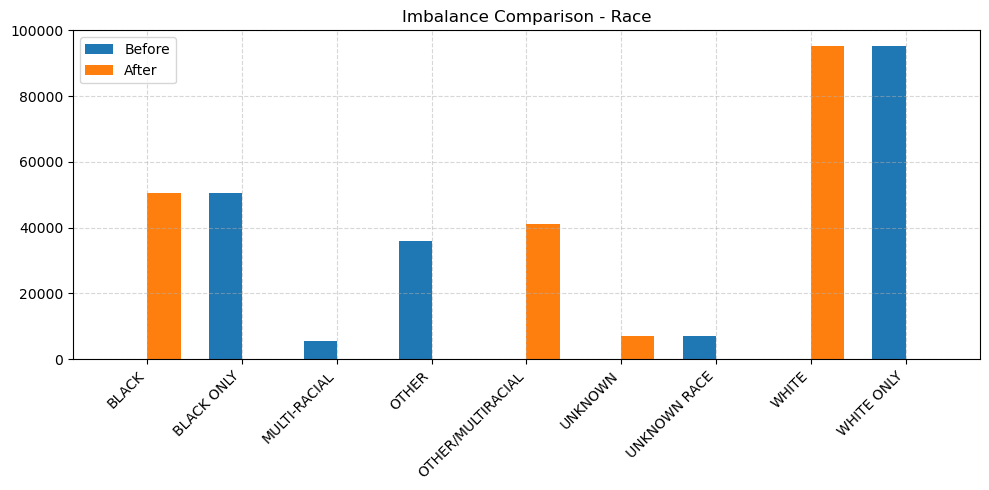

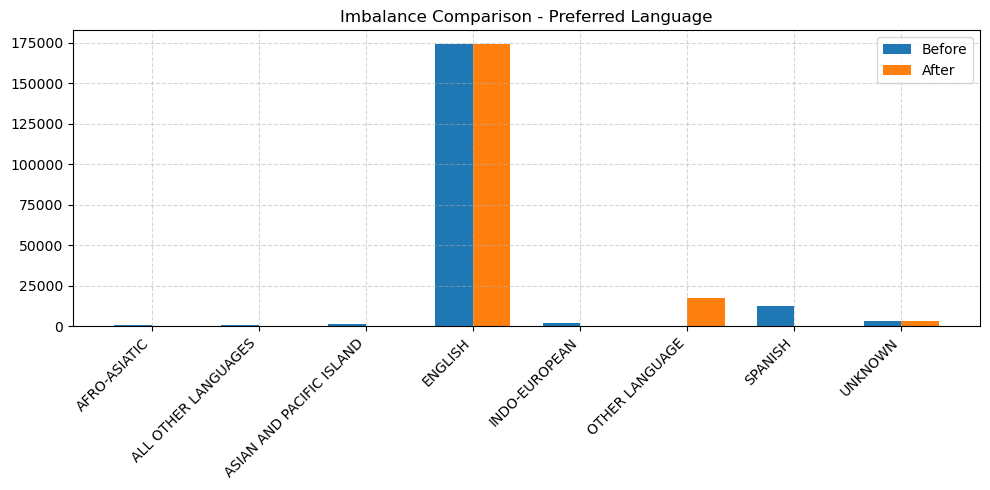

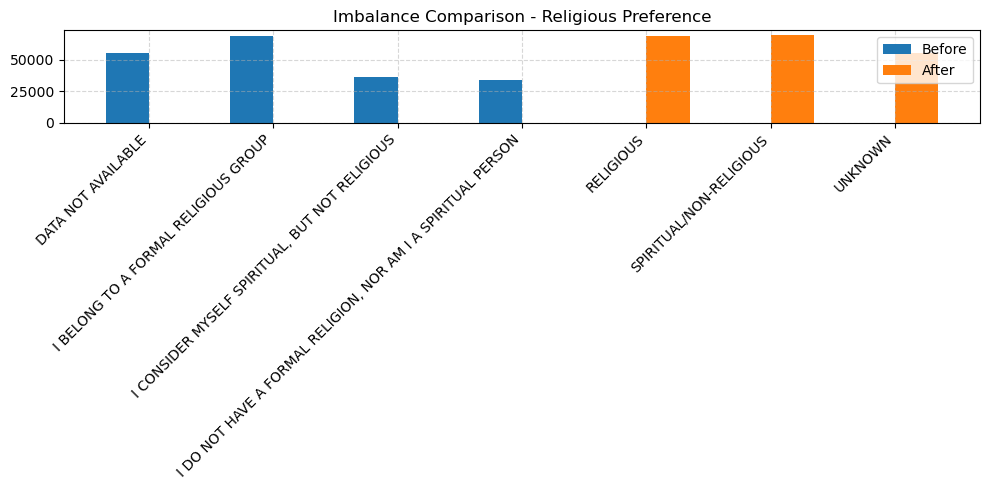

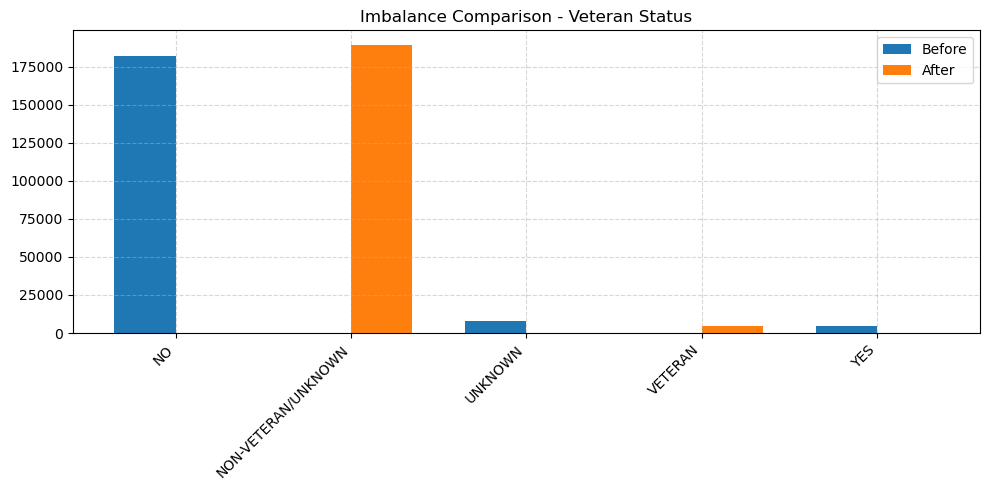

In [44]:
# Using Matplotlib

# Example list of columns you want to compare
'''columns_to_compare = [
    'Program Category', 'Region Served', 'Age Group', 'Sex', 'Transgender',
    'Sexual Orientation', 'Hispanic Ethnicity', 'Race', 'Preferred Language',
    'Religious Preference', 'Veteran Status'
]'''

columns_to_compare = new_dem_grp.columns[1:-2]

# Assuming: df_original = original DataFrame before aggregation
#           df_aggregated = DataFrame after aggregation

for col in columns_to_compare:
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Original counts
    original_counts = new_dem_grp[col].value_counts().sort_index()
    
    # Aggregated counts
    aggregated_counts = Demographic_cat_agg[col].value_counts().sort_index()
    
    # Align index (union of both sets of categories)
    all_categories = sorted(set(original_counts.index).union(set(aggregated_counts.index)))
    original_counts = original_counts.reindex(all_categories, fill_value=0)
    aggregated_counts = aggregated_counts.reindex(all_categories, fill_value=0)

    x = range(len(all_categories))
    width = 0.35

    ax.bar(x, original_counts, width=width, label='Before', align='center')
    ax.bar([i + width for i in x], aggregated_counts, width=width, label='After', align='center')

    ax.set_xticks([i + width / 2 for i in x])
    ax.set_xticklabels(all_categories, rotation=45, ha='right')
    ax.set_title(f'Imbalance Comparison - {col}')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


In [45]:
#Using Plotly

for col in columns_to_compare:
    original_counts = new_dem_grp[col].value_counts().sort_index()
    aggregated_counts = Demographic_cat_agg[col].value_counts().sort_index()

    all_categories = sorted(set(original_counts.index).union(set(aggregated_counts.index)))
    original_counts = original_counts.reindex(all_categories, fill_value=0)
    aggregated_counts = aggregated_counts.reindex(all_categories, fill_value=0)

    fig = go.Figure(data=[
        go.Bar(name='Before', x=all_categories, y=original_counts, marker_color='indianred'),
        go.Bar(name='After', x=all_categories, y=aggregated_counts, marker_color='steelblue')
    ])

    fig.update_layout(
        title=f'Imbalance Comparison - {col}',
        barmode='group',
        xaxis_tickangle=-45,
        xaxis_title=col,
        yaxis_title='Count',
        template='plotly_white',
        height=500
    )

    fig.show()


1. We can further reduce the imbalace and/or reduce the number of features by merging features highly correlated and/or are kind of redudant. 

2. then use Chi-square test if we need to further reduce the number of features by selecting the ones with most effect size

3. The Three digit columns can be removed

#### Feature Enginnering: building new feature by merging the some previous ones

In [87]:
def gender_identity_group(row):
    sex = row['Sex']
    trans = row['Transgender']
    orient = row['Sexual Orientation']
    
    if sex in ['MAN', 'WOMAN'] and trans == 'CISGENDER' and orient == 'HETEROSEXUAL':
        return 'Cis-Hetero'
    elif sex in ['MAN', 'WOMAN'] and trans == 'CISGENDER' and orient == 'LGBTQ+':
        return 'Cis-LGBTQ+'
    elif sex in ['MAN', 'WOMAN'] and trans == 'CISGENDER':
        return 'Cis-Unknown'
    elif sex in ['MAN', 'WOMAN'] and trans == 'TRANSGENDER/UNKNOWN':
        return 'Non-Cisgender'
    else:
        return 'Unclear'

def cultural_group(row):
    race = row['Race']
    lang = row['Preferred Language']
    eth = row['Hispanic Ethnicity']
    
    if race == 'WHITE' and lang == 'ENGLISH' and eth == 'NON-HISPANIC':
        return 'Majority US'
    elif eth == 'HISPANIC':
        return 'Hispanic'
    elif race == 'MULTI-RACIAL':
        return 'Multiracial'
    elif lang not in ['ENGLISH', 'UNKNOWN']:
        return 'Immigrant/Other Lang'
    else:
        return 'Unknown'


#Apply
Demographic_cat_agg_feat_merg = Demographic_cat_agg.copy()

Demographic_cat_agg_feat_merg['Gender Identity Group'] = Demographic_cat_agg_feat_merg.apply(gender_identity_group, axis=1)

Demographic_cat_agg_feat_merg['Cultural Group'] = Demographic_cat_agg_feat_merg.apply(cultural_group, axis=1)

Demographic_cat_agg_feat_merg.drop(columns=['Sex', 'Transgender', 'Sexual Orientation', 'Race', 'Preferred Language', 'Hispanic Ethnicity', 'Three Digital Residence Zip Code'], inplace=True)

Demographic_cat_agg_feat_merg.head()


KeyError: "['Three Digital Residence Zip Code'] not found in axis"

EDA - Social Group

In [ ]:
Social.head()

,Living Situation,Household Composition,Employment Status,Number Of Hours Worked Each Week,Education Status,Special Education Services,Criminal Justice Status,SSI Cash Assistance,SSDI Cash Assistance,Veterans Disability Benefits,Veterans Cash Assistance,Public Assistance Cash Program,Other Cash Benefits
0,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,EMPLOYED,01-14 HOURS,COLLEGE OR GRADUATE DEGREE,NOT APPLICABLE,NO,NO,NO,NO,NO,NO,NO
1,PRIVATE RESIDENCE,LIVES ALONE,EMPLOYED,01-14 HOURS,COLLEGE OR GRADUATE DEGREE,NOT APPLICABLE,NO,NO,NO,NO,NO,NO,NO
2,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,EMPLOYED,15-34 HOURS,SOME COLLEGE,NOT APPLICABLE,NO,NO,NO,NO,NO,NO,NO
3,OTHER LIVING SITUATION,NOT APPLICABLE,EMPLOYED,15-34 HOURS,MIDDLE SCHOOL TO HIGH SCHOOL,NOT APPLICABLE,NO,YES,NO,NO,NO,NO,NO
4,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,EMPLOYED,35 HOURS OR MORE,SOME COLLEGE,NOT APPLICABLE,NO,NO,NO,NO,NO,YES,NO


In [ ]:
# new social group dataset (I add the target)
new_soc_grp = Social.copy()
new_soc_grp["Mental Illness"] = target["Mental Illness"].values
new_soc_grp.head()

,Living Situation,Household Composition,Employment Status,Number Of Hours Worked Each Week,Education Status,Special Education Services,Criminal Justice Status,SSI Cash Assistance,SSDI Cash Assistance,Veterans Disability Benefits,Veterans Cash Assistance,Public Assistance Cash Program,Other Cash Benefits,Mental Illness
0,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,EMPLOYED,01-14 HOURS,COLLEGE OR GRADUATE DEGREE,NOT APPLICABLE,NO,NO,NO,NO,NO,NO,NO,YES
1,PRIVATE RESIDENCE,LIVES ALONE,EMPLOYED,01-14 HOURS,COLLEGE OR GRADUATE DEGREE,NOT APPLICABLE,NO,NO,NO,NO,NO,NO,NO,YES
2,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,EMPLOYED,15-34 HOURS,SOME COLLEGE,NOT APPLICABLE,NO,NO,NO,NO,NO,NO,NO,YES
3,OTHER LIVING SITUATION,NOT APPLICABLE,EMPLOYED,15-34 HOURS,MIDDLE SCHOOL TO HIGH SCHOOL,NOT APPLICABLE,NO,YES,NO,NO,NO,NO,NO,YES
4,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,EMPLOYED,35 HOURS OR MORE,SOME COLLEGE,NOT APPLICABLE,NO,NO,NO,NO,NO,YES,NO,YES


In [ ]:
# frequency_table  function
def frequency_table(data: pd.DataFrame, target_col: str, feature_cols):
    freq_tab = pd.crosstab(index = data[target_col], columns = data[feature_cols], margins = True)
    rel_table = round(freq_tab/freq_tab.loc["All"], 2)
    return freq_tab, rel_table

In [74]:
#analysis Program Category column
#Survey year column to be dropped

for col in new_soc_grp.columns[0:-1]:
    freq, rel = frequency_table(new_soc_grp, "Mental Illness", col)
    print("Two-way frequency table")
    print(freq)
    #print("Two-way relative frequency table")
    #print(rel)
    print("------" * 15)
    print()
    print()

Two-way frequency table
Living Situation  INSTITUTIONAL SETTING  OTHER LIVING SITUATION  \
Mental Illness                                                    
NO                                   12                     754   
YES                                1361                   31068   
All                                1373                   31822   

Living Situation  PRIVATE RESIDENCE  UNKNOWN     All  
Mental Illness                                        
NO                             4597      214    5577  
YES                          148238     7873  188540  
All                          152835     8087  194117  
------------------------------------------------------------------------------------------


Two-way frequency table
Household Composition  COHABITATES WITH OTHERS  LIVES ALONE  NOT APPLICABLE  \
Mental Illness                                                                
NO                                        3979          684             795   
YES        

Same as Demographic Group, in Social Group, we can see that we have huge imbalance in every columns: more "Mental Illness" with YES than NO

So, it is important to investigate at column level to see if changing&reducing the number of categories in columns can diminish the imbalance problem.

make a "before vs after" visual compairison using Bar plots


Categories smart aggregation


In [77]:
# Functions defintion

# Living Situation
def aggregate_living_situation(df):
    "This function aggregates the initial 4 categories into 3"
    return df['Living Situation'].replace({
                                            'PRIVATE RESIDENCE': 'PRIVATE RESIDENCE',
                                            'OTHER LIVING SITUATION': 'OTHER/UNKNOWN',
                                            'INSTITUTIONAL SETTING': 'INSTITUTIONAL SETTING',
                                            'UNKNOWN': 'OTHER/UNKNOWN'
                                        })

# Houshold Composition
def aggregate_household_composition(df):
    "This function aggregates the initial 4 categories into 3"
    return df['Household Composition'].replace({
                                            'COHABITATES WITH OTHERS': 'COHABITANTS',
                                            'LIVES ALONE': 'LIVES ALONE',
                                            'NOT APPLICABLE': 'UNKNOWN',
                                            'UNKNOWN': 'UNKNOWN'
                                        })

# Employment Status
def aggregate_employment_status(df):
    "This function aggregates the initial 5 categories into 4"
    return df['Employment Status'].replace({
                                        'EMPLOYED': 'SALARIED',
                                        'NON-PAID/VOLUNTEER': 'NONSALARIED',
                                        'NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING FOR WORK': 'NONSALARIED',
                                        'UNEMPLOYED, LOOKING FOR WORK': 'UNEMPLOYED',
                                        'UNKNOWN EMPLOYMENT STATUS': 'UNKNOWN'
                                    })

# Number Of Hours Worked Each Week
def aggregate_weekly_working_hours(df):
    "This function aggregates the initial 5 categories into 4"
    return df['Number Of Hours Worked Each Week'].replace({
                                    '01-14 HOURS': '01-14 HOURS',
                                    '15-34 HOURS': '15-34 HOURS',
                                    '35 HOURS OR MORE': '35 HOURS OR MORE',
                                    'NOT APPLICABLE': 'UNKNOWN',
                                    'UNKNOWN EMPLOYMENT HOURS': 'UNKNOWN'
                                })

# Education Status
def aggregate_education_status(df):
    "This function aggregates the initial 7 categories into 4"
    return df['Education Status'].replace({
                                            'COLLEGE OR GRADUATE DEGREE': 'HIGHLY EDUCATED',
                                            'MIDDLE SCHOOL TO HIGH SCHOOL': 'MEDIUM EDUCATED',
                                            'NO FORMAL EDUCATION': 'LOW EDUCATED',
                                            'OTHER': 'OTHER',
                                            'PRE-K TO FIFTH GRADE': 'LOW EDUCATED',
                                            'SOME COLLEGE': 'HIGHLY EDUCATED',
                                            'UNKNOWN': 'OTHER'
                                        })

# Special Education Services
def aggregate_special_education_services(df):
    "This function improves the interpretability"
    return df['Special Education Services'].replace({
                                            'NO': 'NO/UNKNOWN',
                                            'NOT APPLICABLE': 'NO/UNKNOWN',
                                            'UNKNOWN': 'NO/UNKNOWN',
                                            'YES': 'YES'
                                        })

# Criminal Justice Status
def aggregate_criminal_justice_status(df):
    "This function aggregates the initial 3 categories into 2"
    return df['Criminal Justice Status'].replace({
                                'NO': 'NO/UNKNOWN',
                                'UNKNOWN': 'NO/UNKNOWN',
                                'YES': 'YES'
                            })

# SSI Cash Assistance
def aggregate_SSI_cash_assistance(df):
    "This function aggregates the initial categories into 2"
    return df['SSI Cash Assistance'].replace({
                                            'NO': 'NO/UNKNOWN',
                                            'UNKNOWN': 'NO/UNKNOWN',
                                            'YES': 'YES'
                                        })

# SSDI Cash Assistance
def aggregate_SSDI_cash_ssistance(df):
    "This function aggregates the initial categories into 2"
    return df['SSDI Cash Assistance'].replace({
                                                'NO': 'NO/UNKNOWN',
                                            'UNKNOWN': 'NO/UNKNOWN',
                                            'YES': 'YES'
                                            })

# Veterans Disability Benefits 
def aggregate_veterans_disability_benefits(df):

    return df['Veterans Disability Benefits'].replace({
                                            'NO': 'NO/UNKNOWN',
                                            'UNKNOWN': 'NO/UNKNOWN',
                                            'YES': 'YES'
                                        })

# Veterans Cash Assistance 
def aggregate_veterans_cash_assistance(df):

    return df['Veterans Cash Assistance'].replace({
                                            'NO': 'NO/UNKNOWN',
                                            'UNKNOWN': 'NO/UNKNOWN',
                                            'YES': 'YES'
                                        })

# Public Assistance Cash Program
def aggregate_public_assistance_cash_program(df):

    return df['Public Assistance Cash Program'].replace({
                                            'NO': 'NO/UNKNOWN',
                                            'UNKNOWN': 'NO/UNKNOWN',
                                            'YES': 'YES'
                                        })

# Other Cash Benefits
def aggregate_other_cash_benefits(df):

    return df['Other Cash Benefits'].replace({
                                            'NO': 'NO/UNKNOWN',
                                            'UNKNOWN': 'NO/UNKNOWN',
                                            'YES': 'YES'
                                        })


In [78]:
# Use all the aggregation funxtions into one
def apply_all_aggregations(df):
    df = df.copy()
    df['Living Situation'] = aggregate_living_situation(df)
    df['Household Composition'] = aggregate_household_composition(df)
    df['Employment Status'] = aggregate_employment_status(df)
    df['Number Of Hours Worked Each Week'] = aggregate_weekly_working_hours(df)
    df['Education Status'] = aggregate_education_status(df)
    df['Special Education Services'] = aggregate_special_education_services(df)
    df['Criminal Justice Status'] = aggregate_criminal_justice_status(df)
    df['SSI Cash Assistance'] = aggregate_SSI_cash_assistance(df)
    df['SSDI Cash Assistance'] = aggregate_SSDI_cash_ssistance(df)
    df['Veterans Disability Benefits'] = aggregate_veterans_disability_benefits(df)
    df['Veterans Cash Assistance'] = aggregate_veterans_cash_assistance(df)
    df['Public Assistance Cash Program'] = aggregate_public_assistance_cash_program(df)
    df['Other Cash Benefits'] = aggregate_other_cash_benefits(df)
    return df

In [79]:

# Apply to Social dataset
Social_cat_agg = apply_all_aggregations(new_soc_grp)

# check unique values after aggregation
for col in Social_cat_agg.columns:
    print(f"{col} → {Social_cat_agg[col].unique()}")

Living Situation → ['PRIVATE RESIDENCE' 'OTHER/UNKNOWN' 'INSTITUTIONAL SETTING']
Household Composition → ['COHABITANTS' 'LIVES ALONE' 'UNKNOWN']
Employment Status → ['SALARIED' 'NONSALARIED' 'UNEMPLOYED' 'UNKNOWN']
Number Of Hours Worked Each Week → ['01-14 HOURS' '15-34 HOURS' '35 HOURS OR MORE' 'UNKNOWN']
Education Status → ['HIGHLY EDUCATED' 'MEDIUM EDUCATED' 'OTHER' 'LOW EDUCATED']
Special Education Services → ['NO/UNKNOWN' 'YES']
Criminal Justice Status → ['NO/UNKNOWN' 'YES']
SSI Cash Assistance → ['NO/UNKNOWN' 'YES']
SSDI Cash Assistance → ['NO/UNKNOWN' 'YES']
Veterans Disability Benefits → ['NO/UNKNOWN' 'YES']
Veterans Cash Assistance → ['NO/UNKNOWN' 'YES']
Public Assistance Cash Program → ['NO/UNKNOWN' 'YES']
Other Cash Benefits → ['NO/UNKNOWN' 'YES']
Mental Illness → ['YES' 'NO']


In [80]:
#Let's check again the imbalace between "Yes" an "No" in the target column "Mental Illness"

for col in Social_cat_agg.columns[0:-1]:
    freq, rel = frequency_table(Social_cat_agg, "Mental Illness", col)
    print("Two-way frequency table")
    print(freq)
    #print("Two-way relative frequency table")
    #print(rel)
    print("------" * 15)
    print()
    print()


Two-way frequency table
Living Situation  INSTITUTIONAL SETTING  OTHER/UNKNOWN  PRIVATE RESIDENCE  \
Mental Illness                                                              
NO                                   12            968               4597   
YES                                1361          38941             148238   
All                                1373          39909             152835   

Living Situation     All  
Mental Illness            
NO                  5577  
YES               188540  
All               194117  
------------------------------------------------------------------------------------------


Two-way frequency table
Household Composition  COHABITANTS  LIVES ALONE  UNKNOWN     All
Mental Illness                                                  
NO                            3979          684      914    5577
YES                         107205        38490    42845  188540
All                         111184        39174    43759  194117
-------------

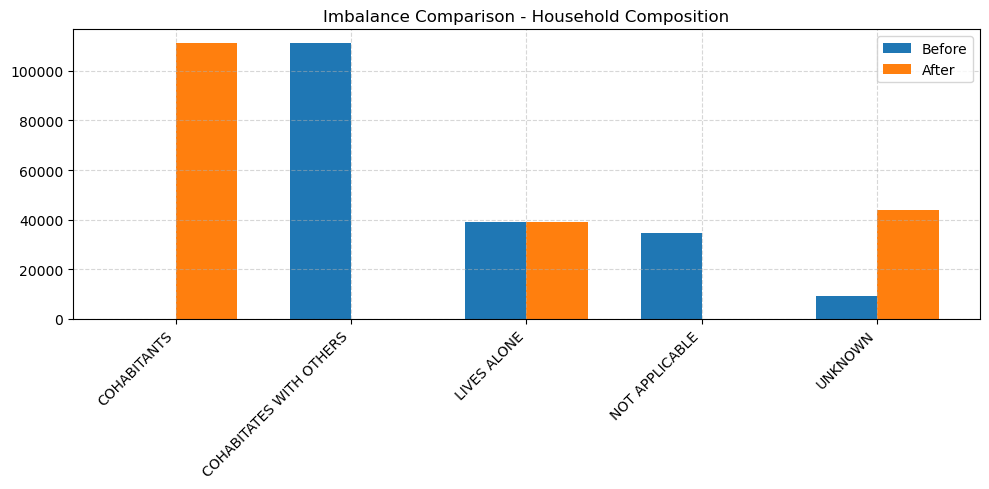

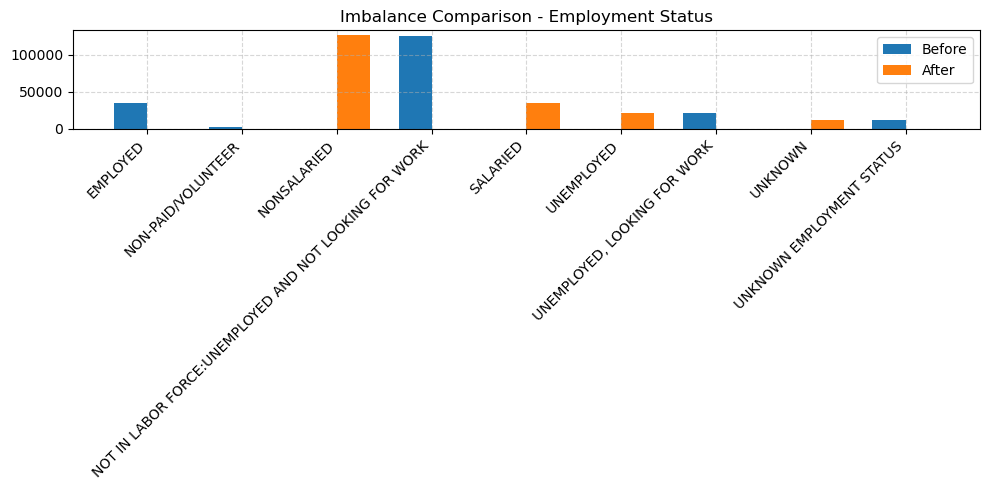

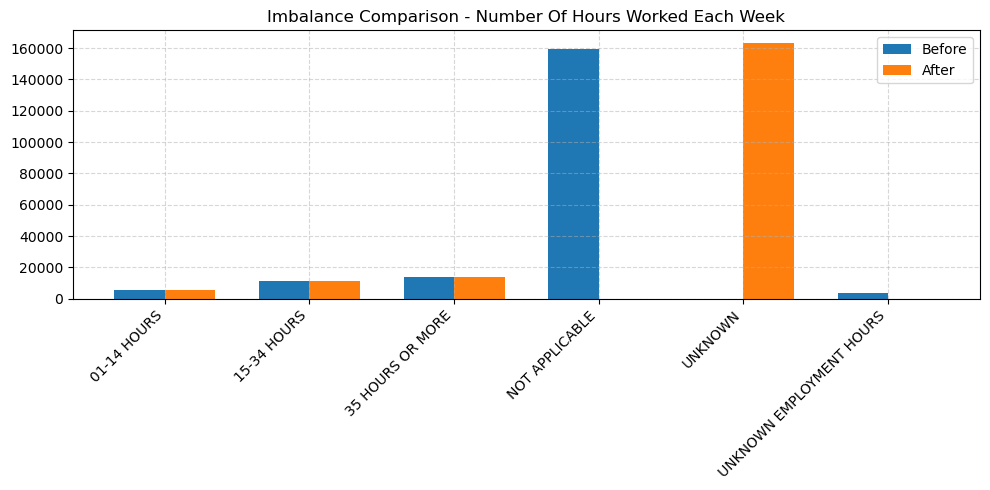

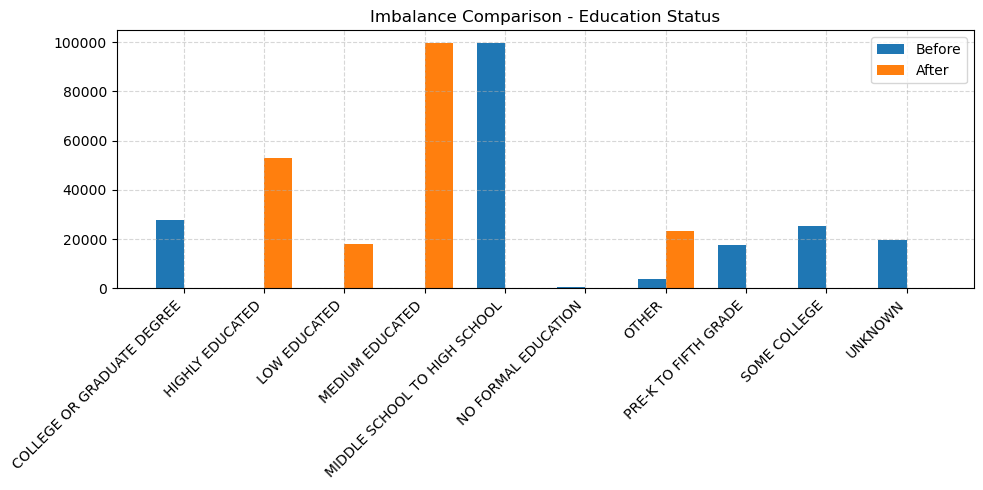

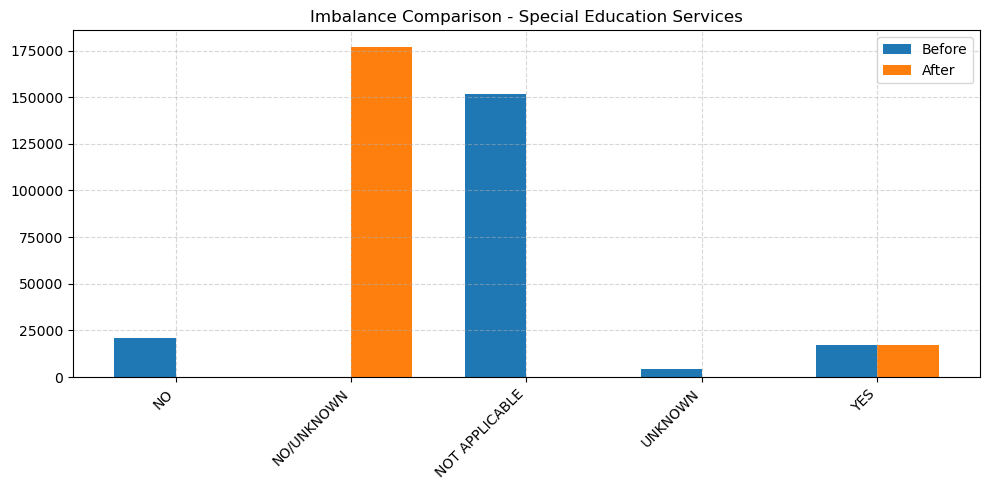

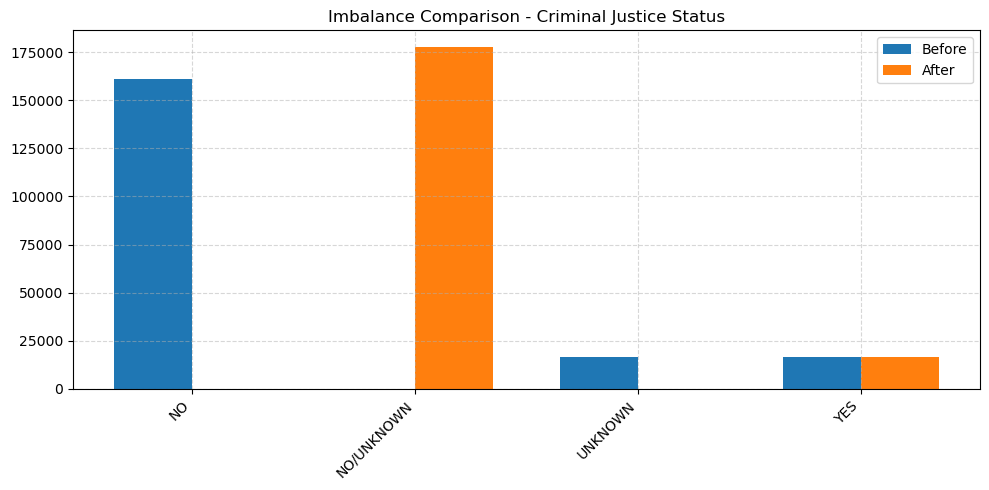

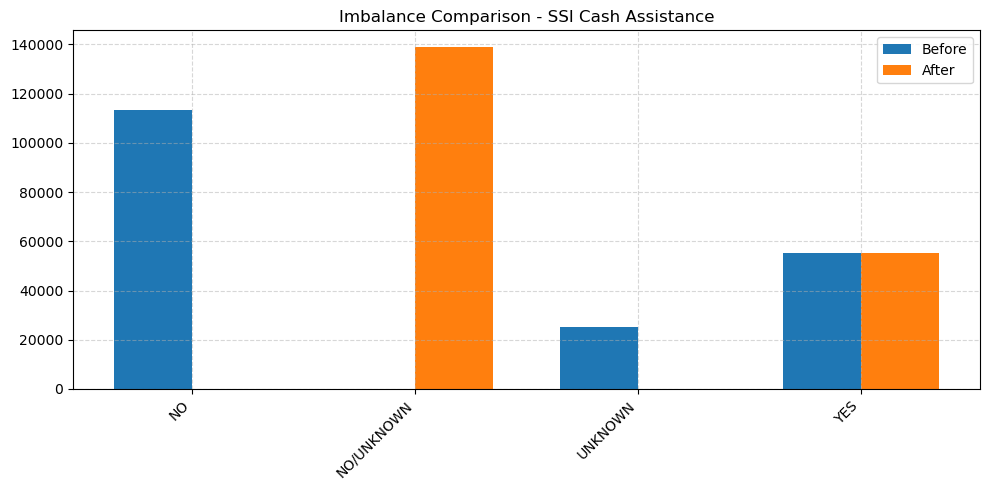

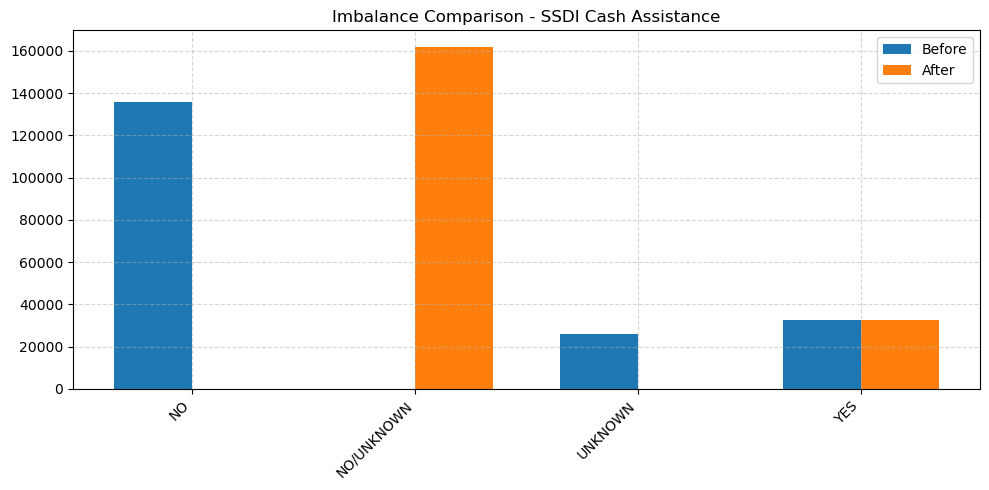

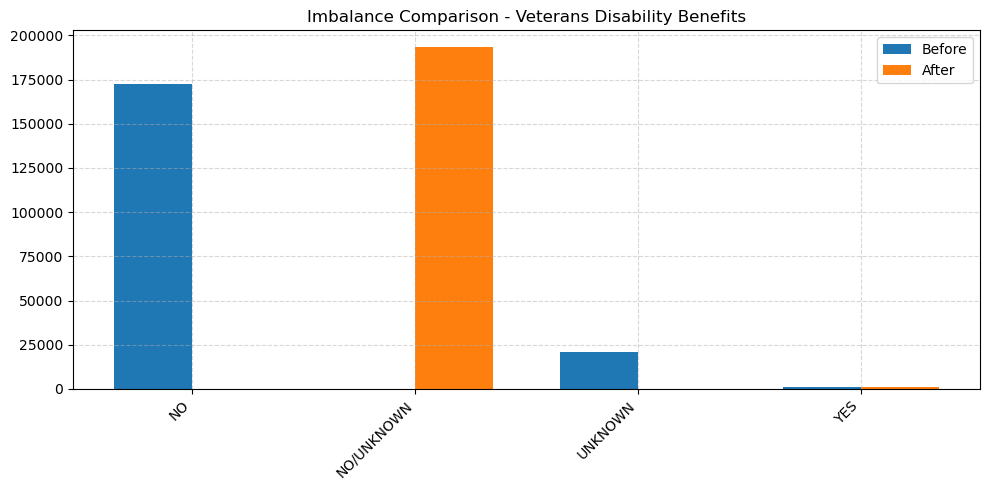

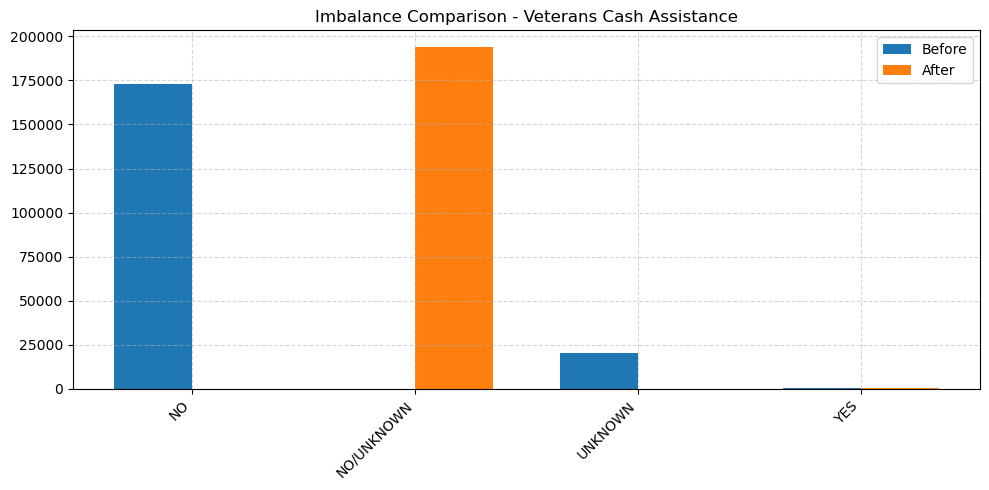

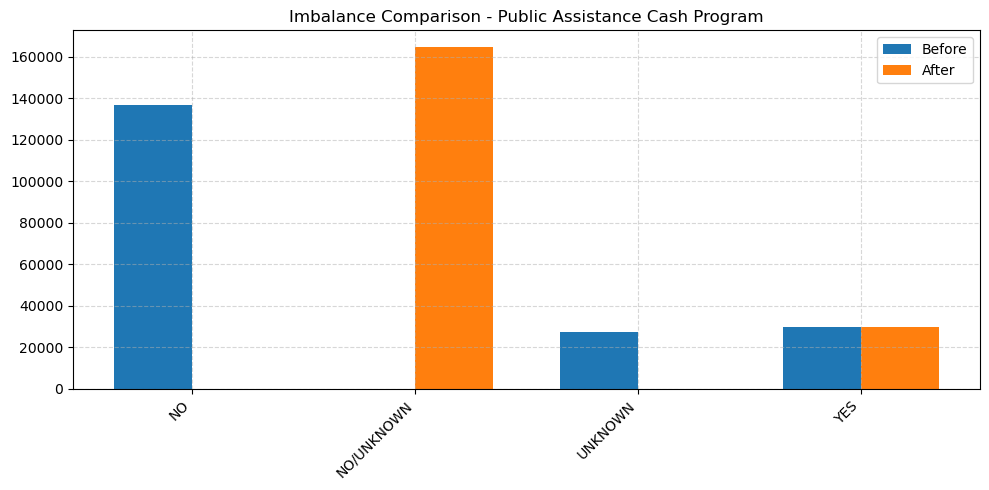

In [84]:
# Using Matplotlib

# Example list of columns you want to compare
'''columns_to_compare = [
    'Living Situation', 'Household Composition', 'Employment Status', 'Number Of Hours Worked Each Week', 'Education Status', 'Special Education Services',
    'Criminal Justice Status', 'SSI Cash Assistance', 'SSDI Cash Assistance', 'Veterans Disability Benefits',
    'Veterans Cash Assistance', 'Public Assistance Cash Program', 'Other Cash Benefits'
]'''

columns_to_compare = new_soc_grp.columns[1:-2]

# Assuming: df_original = original DataFrame before aggregation
#           df_aggregated = DataFrame after aggregation

for col in columns_to_compare:
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Original counts
    original_counts = new_soc_grp[col].value_counts().sort_index()
    
    # Aggregated counts
    aggregated_counts = Social_cat_agg[col].value_counts().sort_index()
    
    # Align index (union of both sets of categories)
    all_categories = sorted(set(original_counts.index).union(set(aggregated_counts.index)))
    original_counts = original_counts.reindex(all_categories, fill_value=0)
    aggregated_counts = aggregated_counts.reindex(all_categories, fill_value=0)

    x = range(len(all_categories))
    width = 0.35

    ax.bar(x, original_counts, width=width, label='Before', align='center')
    ax.bar([i + width for i in x], aggregated_counts, width=width, label='After', align='center')

    ax.set_xticks([i + width / 2 for i in x])
    ax.set_xticklabels(all_categories, rotation=45, ha='right')
    ax.set_title(f'Imbalance Comparison - {col}')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

In [83]:
#Using Plotly

for col in columns_to_compare:
    original_counts = new_soc_grp[col].value_counts().sort_index()
    aggregated_counts = Social_cat_agg[col].value_counts().sort_index()

    all_categories = sorted(set(original_counts.index).union(set(aggregated_counts.index)))
    original_counts = original_counts.reindex(all_categories, fill_value=0)
    aggregated_counts = aggregated_counts.reindex(all_categories, fill_value=0)

    fig = go.Figure(data=[
        go.Bar(name='Before', x=all_categories, y=original_counts, marker_color='indianred'),
        go.Bar(name='After', x=all_categories, y=aggregated_counts, marker_color='steelblue')
    ])

    fig.update_layout(
        title=f'Imbalance Comparison - {col}',
        barmode='group',
        xaxis_tickangle=-45,
        xaxis_title=col,
        yaxis_title='Count',
        template='plotly_white',
        height=500
    )

    fig.show()

In [90]:
def living_situation_group(row):
    living_situation = row['Living Situation']
    
    if living_situation == 'PRIVATE RESIDENCE':
        return 'Private'
    elif living_situation == 'INSTITUTIONAL SETTING':
        return 'Institutional'
    else:
        return 'Other/Unknown'
def employment_group(row):
    employment_status = row['Employment Status']
    
    if employment_status == 'SALARIED':
        return 'Employed'
    elif employment_status in ['NONSALARIED', 'UNEMPLOYED']:
        return 'Not Employed'
    else:
        return 'Unknown'
    

# Apply grouping functions to create new columns
Social_cat_agg_feat_merg = Social_cat_agg.copy()

Social_cat_agg_feat_merg['Living Situation Group'] = Social_cat_agg_feat_merg.apply(living_situation_group, axis=1)
Social_cat_agg_feat_merg['Employment Group'] = Social_cat_agg_feat_merg.apply(employment_group, axis=1)

# Drop original columns that are no longer needed
Social_cat_agg_feat_merg.drop(columns=['Living Situation', 'Employment Status'], inplace=True)

# Display the first few rows of the updated DataFrame
Social_cat_agg_feat_merg.head()


def education_group(row):
    education_status = row['Education Status']
    
    if education_status in ['HIGHLY EDUCATED', 'MEDIUM EDUCATED']:
        return 'Educated'
    elif education_status == 'LOW EDUCATED':
        return 'Low Education'
    else:
        return 'Unknown'

def criminal_justice_group(row):
    criminal_status = row['Criminal Justice Status']
    
    if criminal_status == 'YES':
        return 'Involved'
    else:
        return 'Not Involved/Unknown'
    
# Function to aggregate multiple cash assistance related columns into one summary column
def cash_assistance_group(row):
    cash_cols = [
        'SSI Cash Assistance',
        'SSDI Cash Assistance',
        'Veterans Disability Benefits',
        'Veterans Cash Assistance',
        'Public Assistance Cash Program',
        'Other Cash Benefits'
    ]
    # If any cash assistance column is 'YES', then overall is 'Receiving Cash Assistance'
    for col in cash_cols:
        if col in row and row[col] == 'YES':
            return 'Receiving Cash Assistance'
    return 'No/Unknown'

# Assuming your aggregated social DataFrame is named Social_cat_agg_feat_merg

# Add the new Cash Assistance Situation column:
Social_cat_agg_feat_merg['Cash Assistance Situation'] = Social_cat_agg_feat_merg.apply(cash_assistance_group, axis=1)

# Optional: Drop the original cash assistance columns if no longer needed
cols_to_drop = [
    'Household Composition',
    'Number Of Hours Worked Each Week',
    'Special Education Services',
    'SSI Cash Assistance',
    'SSDI Cash Assistance',
    'Veterans Disability Benefits',
    'Veterans Cash Assistance',
    'Public Assistance Cash Program',
    'Other Cash Benefits'
]

Social_cat_agg_feat_merg.drop(columns=cols_to_drop, inplace=True)


Social_cat_agg_feat_merg['Education Group'] = Social_cat_agg_feat_merg.apply(education_group, axis=1)
Social_cat_agg_feat_merg['Criminal Justice Group'] = Social_cat_agg_feat_merg.apply(criminal_justice_group, axis=1)

# Drop original columns that are no longer needed
Social_cat_agg_feat_merg.drop(columns=['Education Status', 'Criminal Justice Status'], inplace=True)

# Display the first few rows of the updated DataFrame
Social_cat_agg_feat_merg.head()


,Mental Illness,Living Situation Group,Employment Group,Cash Assistance Situation,Education Group,Criminal Justice Group
0,YES,Private,Employed,No/Unknown,Educated,Not Involved/Unknown
1,YES,Private,Employed,No/Unknown,Educated,Not Involved/Unknown
2,YES,Private,Employed,No/Unknown,Educated,Not Involved/Unknown
3,YES,Other/Unknown,Employed,Receiving Cash Assistance,Educated,Not Involved/Unknown
4,YES,Private,Employed,Receiving Cash Assistance,Educated,Not Involved/Unknown


In [91]:
import pandas as pd

# Specify the file name and path
file_name = 'social_group_data.csv'

# Export the DataFrame to a CSV file
Social_cat_agg_feat_merg.to_csv(file_name, index=False)

print(f"Data exported successfully to {file_name}")


Exception ignored in: <function ZipFile.__del__ at 0x0000017010543060>
Traceback (most recent call last):
  File "c:\Users\danhd\Anaconda_3\Lib\zipfile.py", line 1874, in __del__
    self.close()
  File "c:\Users\danhd\Anaconda_3\Lib\zipfile.py", line 1891, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


Data exported successfully to social_group_data.xlsx
